## 1. Titanic dataset


## 1.1 Download dataset

In [ ]:
!rm -f titanic.zip
!rm -rf ./titanic
!gdown -q 1QkDxNX867xUXUtZmBDwosEBZxQB9NJsH
!unzip -q titanic.zip

# 1.2 Exploratory Data Analysis (EDA)

## **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("default")

## **Information of raw_df and print the some rows from the dataset to observe**

In [ ]:
filename = "/content/titanic/train.csv"
raw_train_df = pd.read_csv(filename)
raw_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
raw_train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
raw_train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S


## **Plot the distribution of all attributes in raw_train_df**   
(except PassengerID and Name because it's meaningless; Survived because it is the label in y)  
From the plots, we can conclude that:

*   All the categorical attributes are very imbalanced
*   The continuous attributes (Ages and Fare) follow normal distribution but skew to the right



<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


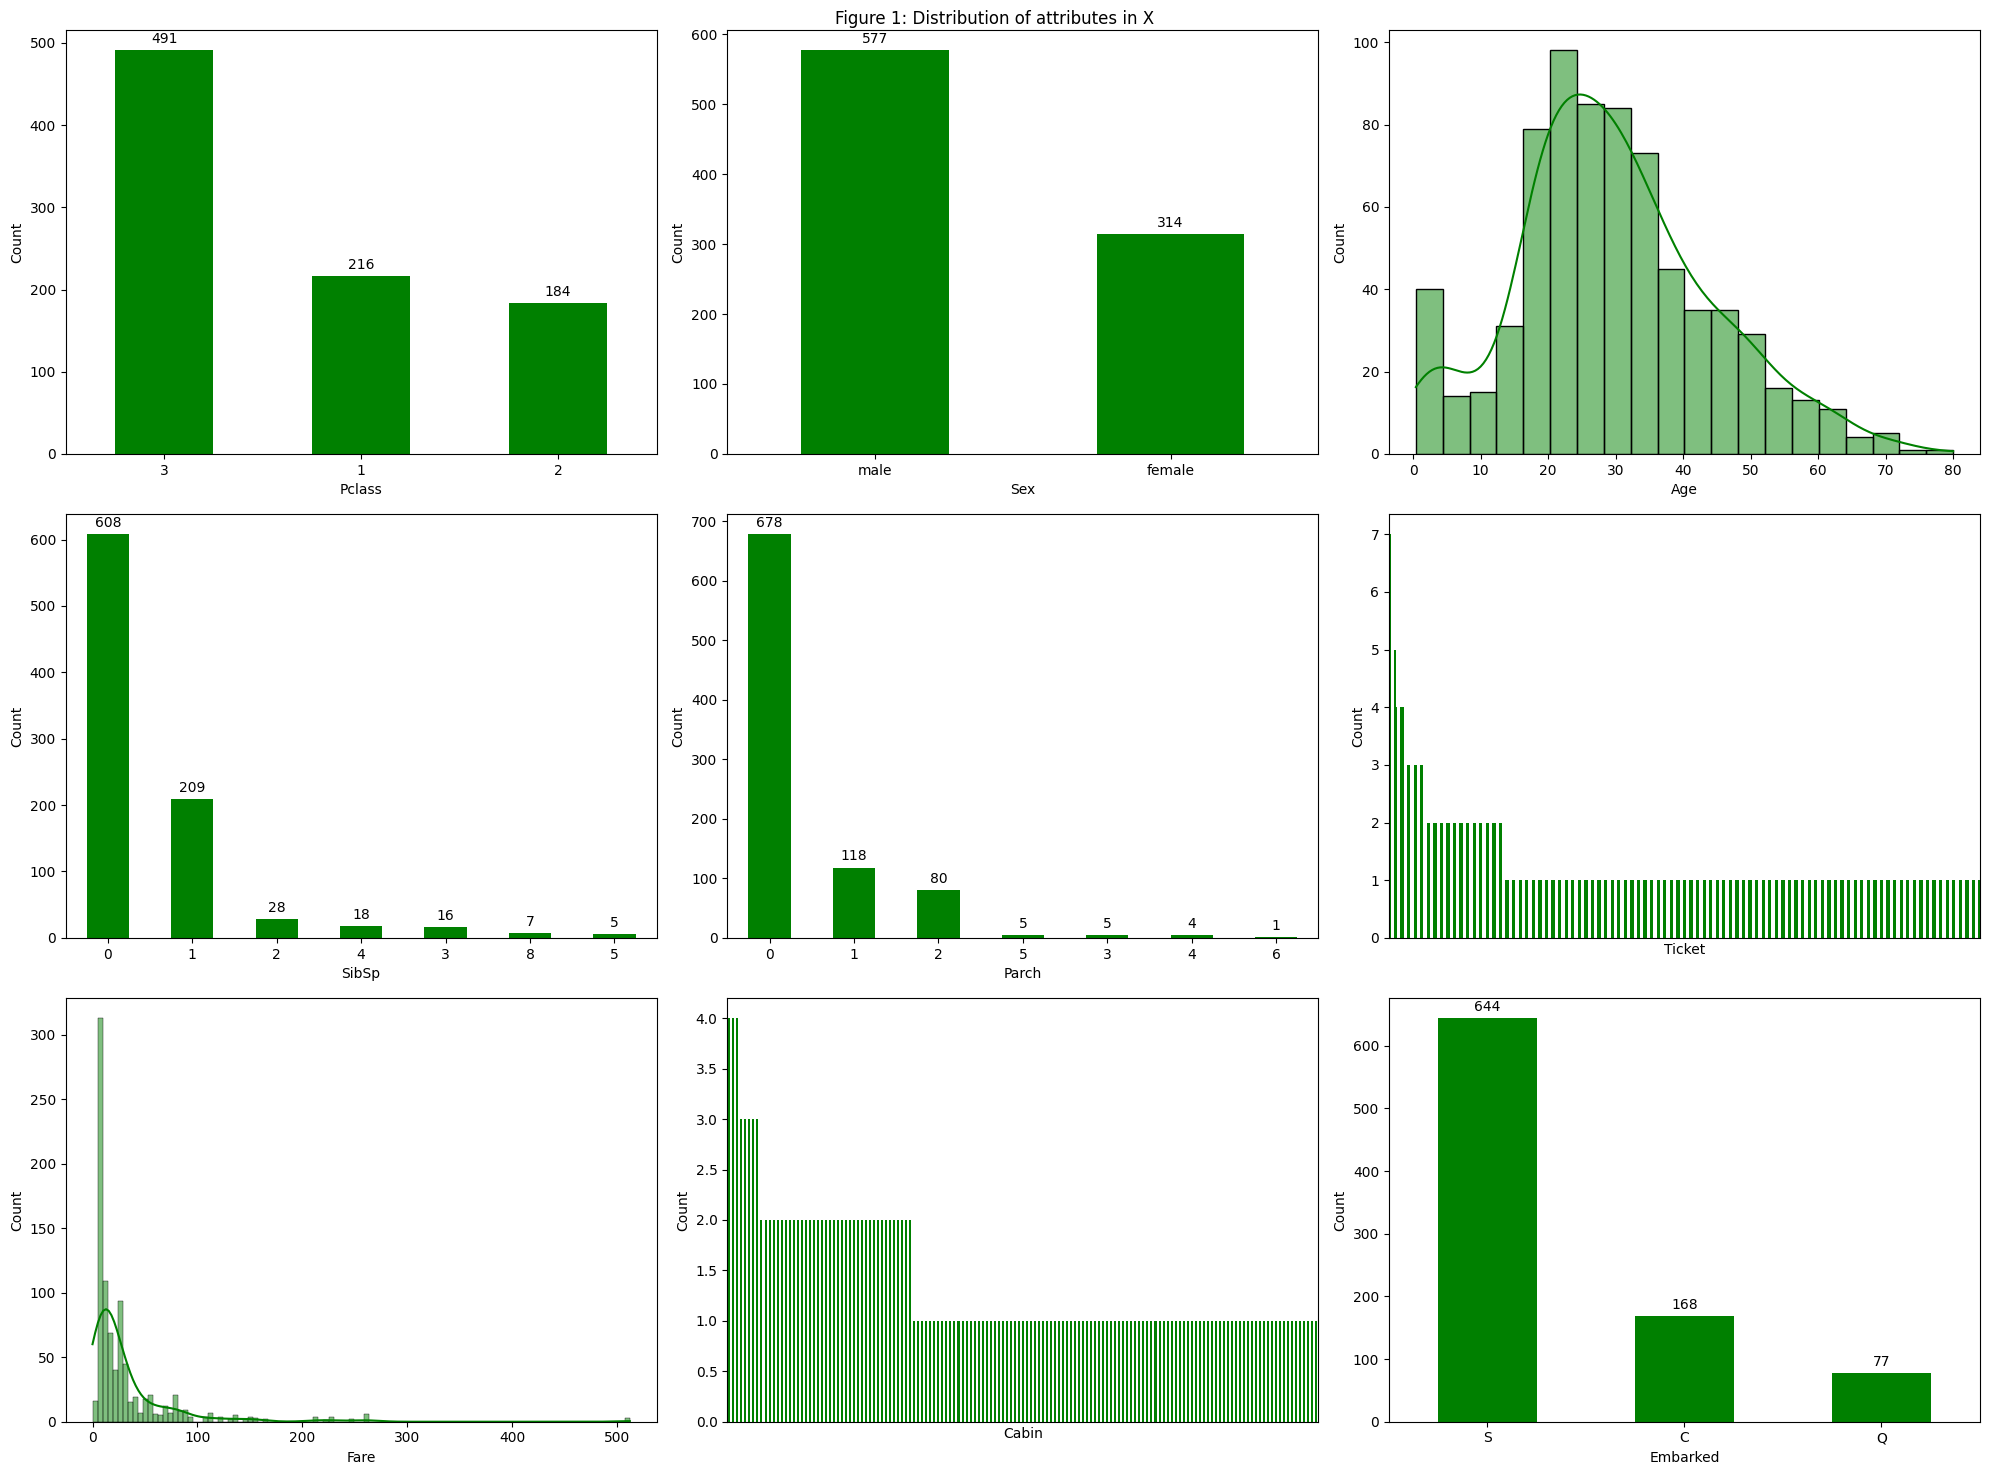

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
X_plot = raw_train_df.copy()
X_plot = X_plot.drop(["PassengerId","Survived","Name"], axis=1)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()
for i, feature in enumerate(X_plot.columns):
  if np.issubdtype(X_plot[feature].dtype, np.floating):
      sns.histplot(data=X_plot, x=feature, kde=True, color="green", ax=axes[i])
  else:
      ax = X_plot[feature].value_counts().plot(kind="bar", color='green', ax=axes[i], ylabel="Count")
      categories = X_plot[feature].nunique()
      if categories <= 8:
        ax.set_xticks(np.arange(categories))
        ax.set_xticklabels(X_plot[feature].value_counts().index)
        ax.tick_params(axis="x", rotation=360)
        for container in ax.containers:
          ax.bar_label(container, padding=3)
      else:
        ax.set_xticks([])
plt.suptitle("Figure 1: Distribution of attributes in X")
plt.tight_layout()
plt.show()

**Distribution of survivals (labels) in raw_df**




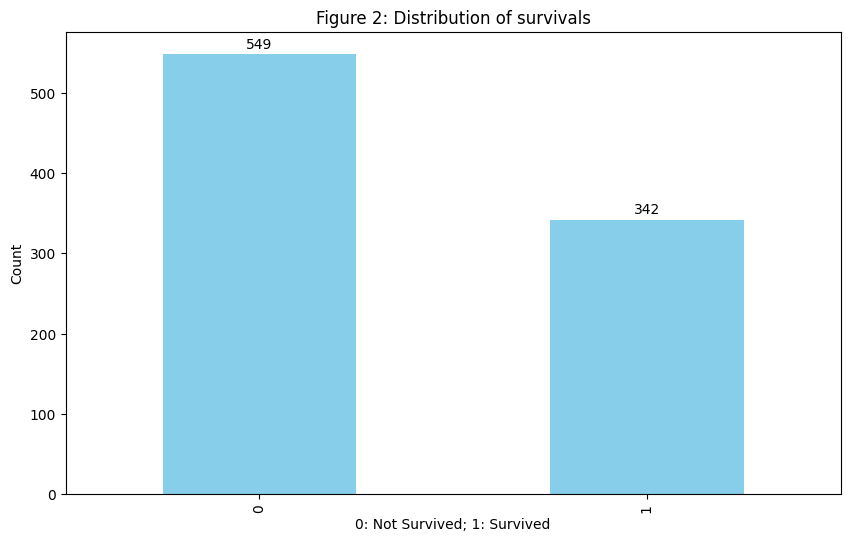

In [ ]:
ax = raw_train_df.Survived.value_counts().plot(kind='bar', color='skyblue',figsize=(10,6))
for container in ax.containers:
  ax.bar_label(container, padding=2)
plt.title("Figure 2: Distribution of survivals")
plt.xlabel("0: Not Survived; 1: Survived")
plt.ylabel("Count")
plt.show()

**Correlation between the attributes with survival rate**
* ***How Pclass (Passenger Class) and Sex affect Survival Rate:*** It can be seen from the plot that these two attributes had impacts on survival rate: Passenger Class 1 had highest survival rate and women had highest chance to survive among all passenger class   


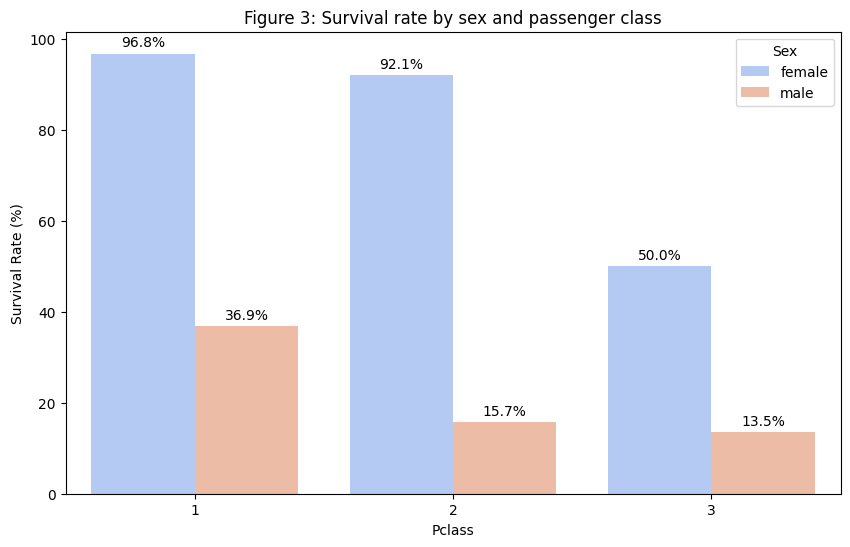

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=raw_train_df["Pclass"], y=raw_train_df["Survived"]*100, errorbar=None, hue=raw_train_df["Sex"], palette="coolwarm")
for container in ax.containers:
  ax.bar_label(container, fmt="%.1f%%", padding=3)
plt.title("Figure 3: Survival rate by sex and passenger class")
ax.set_ylabel("Survival Rate (%)")
plt.show()

* ***How Age and Sex affect Survival Rate:*** It can be seen from the plot that
distribution was similar for survivors and non-survivors within each sex; young men were more likely to survive but older women were more likely to survive. Most survivors aged around 30 years old.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


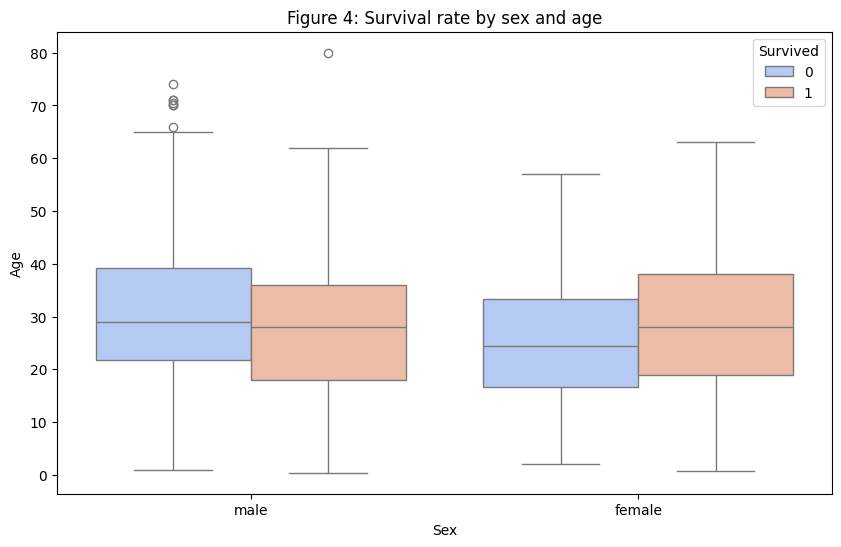

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=raw_train_df, y="Age", hue="Survived", x="Sex", palette="coolwarm")
plt.title("Figure 4: Survival rate by sex and age")
plt.show()

* ***How number of family members affect Survival Rate:*** Here I combined two attributes: Number of Parent/Children on board (Parch) and Number of Siblings/Spouse on board (SibSp) into one attribute called FamilySize. From the bar chart, it can be seen that survivors in a family of 2-4 (including themselves) were most likely, maybe because they could co-operate and support each other to survive.  
* We will not plot the graph between Tickets and Surival Rate because as seen
from the overview graph, there can be individual tickets up to ticket for 7 people. The people who shared same ticket number may know each other and belong to a family and we have FamilySize attribute which can better demonstrate this aspect.

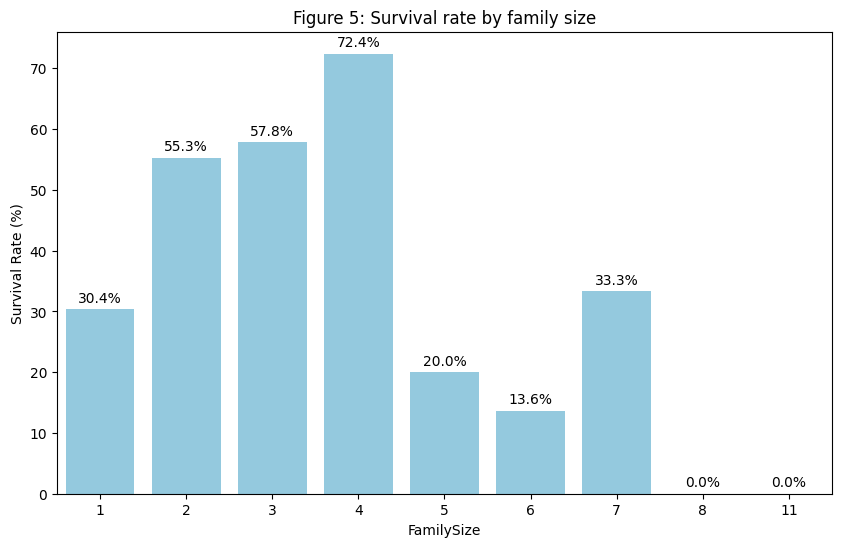

In [ ]:
raw_train_df['FamilySize'] = raw_train_df['SibSp'] + raw_train_df['Parch'] + 1
plt.figure(figsize=(10,6))
ax = sns.barplot(x=raw_train_df["FamilySize"], y=raw_train_df["Survived"]*100, errorbar=None, color="skyblue")
for container in ax.containers:
  ax.bar_label(container, fmt="%.1f%%", padding=3)
plt.title("Figure 5: Survival rate by family size")
ax.set_ylabel("Survival Rate (%)")
plt.show()

* ***How Fare affect Survival Rate:*** Chart #6 showed most non-survival paid less fare and were mostly in Passenger Class 3; on the other hand, survivors were mostly in Class 1 and 2, they also paid higher price, especially top 3 most paid passenegers survived the accident

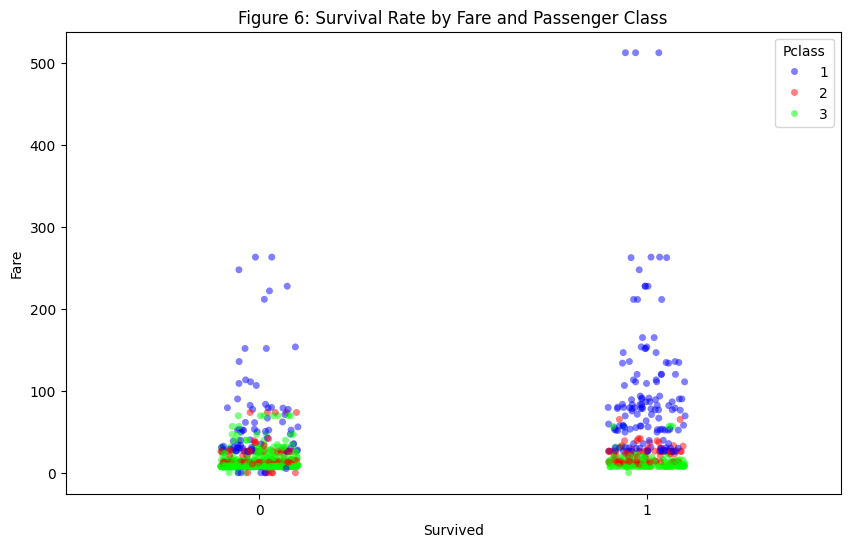

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(data=raw_train_df,x="Survived", y="Fare", jitter=True, alpha=0.5, hue="Pclass", palette="brg")
plt.title("Figure 6: Survival Rate by Fare and Passenger Class")
plt.show()

* ***How Cabin type affect Survival Rate:*** This is the attribute with a lot of missing values. For now, based on Chart #1, I categorized values into 5 classes: 1-individual, 2-duo, 3-trio, 4-group of 4 cabin type, the last category is the ones with missing values-0. From chart #7, it can be seen that duo cabin passengers were most likely to survive, while the passengers with missing information of cabin were less likely to survive.

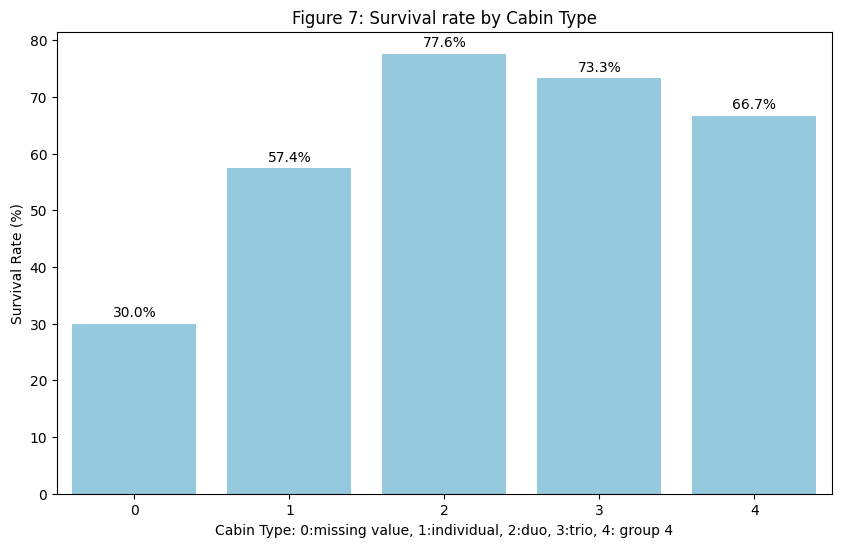

In [ ]:
cabin_counts = raw_train_df.Cabin.value_counts()
raw_train_df["CabinType"] = raw_train_df["Cabin"].map(cabin_counts)
raw_train_df["CabinType"] = raw_train_df["CabinType"].fillna(0).astype(int)
plt.figure(figsize=(10,6))
ax = sns.barplot(x=raw_train_df["CabinType"], y=raw_train_df["Survived"]*100, errorbar=None, color="skyblue")
for container in ax.containers:
  ax.bar_label(container, fmt="%.1f%%", padding=3)
plt.title("Figure 7: Survival rate by Cabin Type")
ax.set_xlabel("Cabin Type: 0:missing value, 1:individual, 2:duo, 3:trio, 4: group 4")
ax.set_ylabel("Survival Rate (%)")
plt.show()

* ***How Embarkation Port affect Survival Rate:*** Survivors mostly embarked from Cherbourg (C), followed by Queenstown (Q) and Southampton (S)
* Also, chart #9 showed that for Cherbourg and Southampton, the survivors paid higher fare than non-survivors but the fare for survivors and non-survivors embarked at Queenstown was not too significantly different

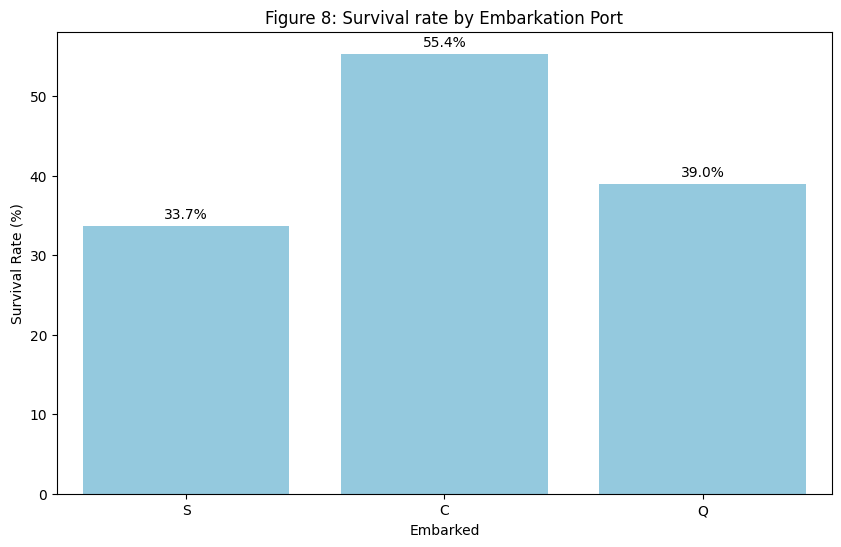

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=raw_train_df["Embarked"], y=raw_train_df["Survived"]*100, errorbar=None, color="skyblue")
for container in ax.containers:
  ax.bar_label(container, fmt="%.1f%%", padding=3)
plt.title("Figure 8: Survival rate by Embarkation Port")
ax.set_ylabel("Survival Rate (%)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


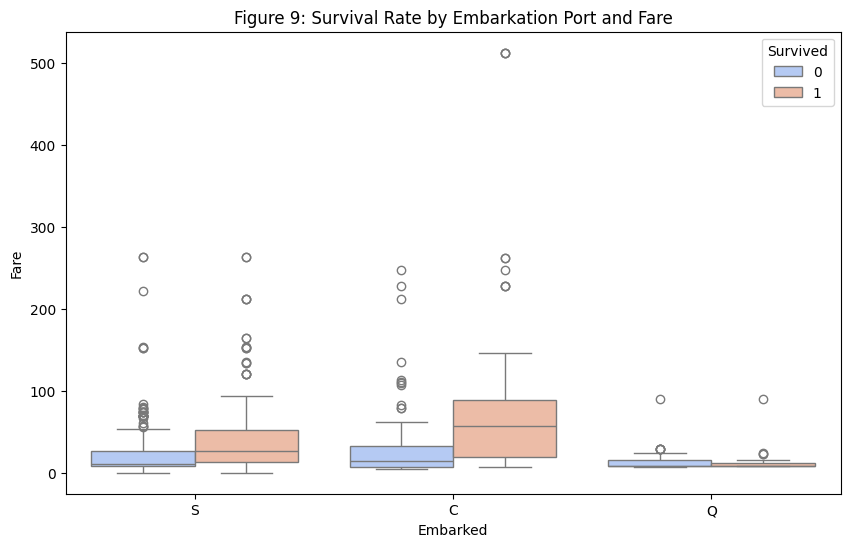

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=raw_train_df, x="Embarked", hue="Survived", y="Fare", palette="coolwarm")
plt.title("Figure 9: Survival Rate by Embarkation Port and Fare")
plt.show()

## **Null values analysis and data imputation**

From isnull().sum(), we figured out there are 3 columns with null values, which are:


*   Age: 177 null values
*   Cabin: 687 null values
*   Embark: 2 null values  

In [ ]:
raw_train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


* Drop unnecessary columns: PassengerID, Name, SibSp + Parch (transformed previously into FamilySize), Ticket, Cabin (transformed to CabinType)
* For the Embark column, since the number of null value is small, so we can drop the rows with null values
* For the Cabin column, from previous analysis, we recognized the missing values rows could also be interpreted since passengers without a cabin number had lower survival rate. Therefore we kept the approach to divide the values into 5 categories depend on their capacity (individual, duo, trio, group of 4) and missing values marked as 0
* For the Age column, I will fill null values with average age value

In [ ]:
cleaned_train_df = raw_train_df.dropna(subset="Embarked")
cleaned_train_df = cleaned_train_df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin"])
avg_age = cleaned_train_df.Age.dropna().mean()
cleaned_train_df.Age = cleaned_train_df.Age.fillna(avg_age)
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    object 
 6   FamilySize  889 non-null    int64  
 7   CabinType   889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


**Mapping classes to indices: for categorical data**

In [ ]:
cleaned_train_df.Sex = cleaned_train_df.Sex.map({"male": 0, "female": 1})
cleaned_train_df.Embarked = cleaned_train_df.Embarked.map({"S": 0, "C": 1, "Q": 2})

# 1.3 Training

## **Separate into X_train and y_train**

In [ ]:
X_train = cleaned_train_df.drop(columns="Survived")
y_train = cleaned_train_df.Survived

## **Preprocess X_test and y_test to match with X_train and y_train**`

In [ ]:
test_df = pd.read_csv("/content/titanic/test.csv")
y_test = pd.read_csv("/content/titanic/gender_submission.csv")
test_df = pd.merge(test_df, y_test, on='PassengerId', how='left')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#Add CabinType column
cabin_counts = test_df.Cabin.value_counts()
test_df["CabinType"] = test_df["Cabin"].map(cabin_counts)
test_df["CabinType"] = test_df["CabinType"].fillna(0).astype(int)
# Add FamilySize column
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
# Data imputation
test_df = test_df.dropna(subset="Fare").copy()
avg_score = raw_train_df.Age.dropna().mean()
test_df.Age = test_df.Age.fillna(avg_score)
# Drop unnecessary columns
test_df = test_df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin"])
# Split to X_test and y_test
X_test = test_df.drop(columns="Survived")
y_test = test_df.Survived
# Map classes to indices
X_test.Sex = X_test.Sex.map({"male": 0, "female": 1})
X_test.Embarked = X_test.Embarked.map({"S": 0, "C": 1, "Q": 2})

## **One-hot encoding for categorical columns and normalize for continuous columns**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'FamilySize', 'CabinType']
continuous_cols = ['Age', 'Fare']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), continuous_cols)
])
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(X_train_processed.shape)
print(X_test_processed.shape)
print(preprocessor)

(889, 24)
(417, 24)
ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Pclass', 'Sex', 'Embarked', 'FamilySize',
                                  'CabinType']),
                                ('num', StandardScaler(), ['Age', 'Fare'])])


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


## **Visualize X_train_oh**

In [ ]:
# Get column names from the one-hot encoder
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_cols)

# Combine with continuous column names
all_feature_names = list(ohe_feature_names) + continuous_cols

# Create DataFrame from the processed NumPy array
X_train_array = X_train_processed.toarray() if hasattr(X_train_processed, "toarray") else X_train_processed #ensure dense Numpy array is used
X_train_ohe = pd.DataFrame(X_train_array, columns=all_feature_names)

# Print head of processed X_train
X_train_ohe.head()


,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,FamilySize_1,FamilySize_2,...,FamilySize_7,FamilySize_8,FamilySize_11,CabinType_0,CabinType_1,CabinType_2,CabinType_3,CabinType_4,Age,Fare
0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.589620,-0.500240
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.644848,0.788947
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.281003,-0.486650
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.413385,0.422861
4,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.413385,-0.484133


In [ ]:
X_test_array = X_test_processed.toarray() if hasattr(X_test_processed, "toarray") else X_test_processed #ensure dense Numpy array is used
X_test_ohe = pd.DataFrame(X_test_array, columns=all_feature_names)
X_test_ohe.head(5)

,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,FamilySize_1,FamilySize_2,...,FamilySize_7,FamilySize_8,FamilySize_11,CabinType_0,CabinType_1,CabinType_2,CabinType_3,CabinType_4,Age,Fare
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.374808,-0.488579
1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.339236,-0.505273
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.496550,-0.451165
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.203849,-0.471802
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.589620,-0.398819


## **Model selection for training**  
Choose between some of the common ML algorithms from sklearn: Logistic Regression, Random Forest, Decision Tree, Adaboost, SVC and KNN

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
def evaluate_models(X_train, y_train, X_test, y_test):
  results = []
  for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
  return results

results = evaluate_models(X_train_processed, y_train, X_test_processed, y_test)
for name, acc in results:
  print(f"{name}, {acc:.6f}")

Logistic Regression, 0.940048
Random Forest, 0.820144
AdaBoost, 0.954436
Decision Tree, 0.796163
Support Vector Machine, 0.928058
K-Nearest Neighbors, 0.839329


## **Parameters tuning with best performed model:** AdaBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 80, 100, 120],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'estimator__max_depth': [1, 2, 3, 4]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=1)

# Fit on training data
grid_search.fit(X_train_processed, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict using best estimator
best_model = grid_search.best_estimator_
Y_pred3 = best_model.predict(X_test_processed)


Best Parameters: {'estimator__max_depth': 4, 'learning_rate': 0.01, 'n_estimators': 120}


## **Evaluate AdaBoost performance:**

*   Accuracy: the proportion of all classifications that were correct, whether positive or negative. It is mathematically defined as:
$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{FP} + \text{TN} + \text{FN}}
$$
*   f1 score: The F1 score is the harmonic mean (a kind of average) of precision and recall. The formula:
$$
\text{F1} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}} = \frac{2 \cdot \text{TP}}{2 \cdot \text{TP} + \text{FP} + \text{FN}}
$$

*   Confusion Matrix: visualize TP, TN, FP, FN



Accuracy: 0.9520383693045563
f1 score: 0.9337748344370861
Confusion Matrix:


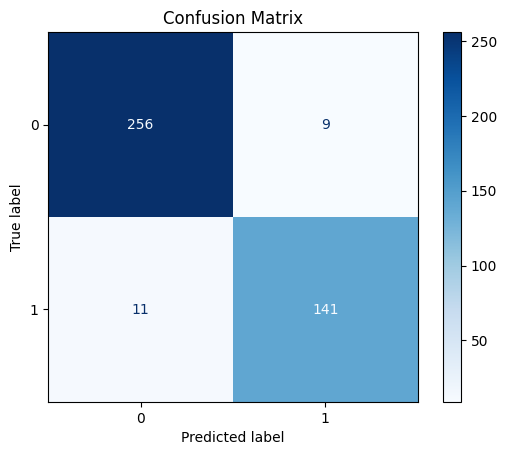

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
print("Accuracy:", accuracy_score(y_test, Y_pred3))
print("f1 score:", f1_score(y_test, Y_pred3))
cm = confusion_matrix(y_test, Y_pred3)
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()